In [1]:
import numpy as np
import pandas as pd

In [3]:
mail = pd.read_csv('/home/kumar/Downloads/emails.csv', encoding='latin-1')
mail.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [8]:
print(mail['text'][0])

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

In [12]:
ham = mail[mail['spam'] != 1]
ham.shape

(4360, 2)

In [13]:
spam = mail[mail['spam'] == 1]
spam.shape

(1368, 2)

In [18]:
ham.head()

print(ham['text'][1368])

Subject: hello guys ,  i ' m " bugging you " for your completed questionnaire and for a one - page  bio / statement on your thoughts on " business edu and the new economy " . if  my records are incorrect please re - ship your responses to me . i want to  put everything together next week so that i can ship it back to everyone .  the questionnaire is attached as well as copies of the bio pages for  michael froehls and myself ( two somewhat different approaches ) . the idea  of the latter is just to introduce yourself to the other panelists and give  them some background on how you are approaching the issues we will discuss .  we will also provide copies to the attendees and use this material for our  personal introductions at the opening of the panel discussions .  thanks and i look forward to seeing you in two weeks .  john  - waco _ background _ mf . doc  - jmartinbiosketch . doc  - questionnaire . doc  john d . martin  carr p . collins chair in finance  finance department  baylor uni

In [19]:
import nltk, os
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
# Import the models from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import f1_score
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import KFold

In [21]:
stopset = stopwords.words("english")

In [23]:
vectorizer = TfidfVectorizer(stop_words = stopset, binary = True)

In [24]:
x = vectorizer.fit_transform(mail.text)
y = mail.spam

In [25]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x,y, test_size=0.3, train_size = 0.7, random_state = 40)

In [26]:
#train function
def train_clf(clf, X, y):
    clf.fit(X,y)
    
#predict function
def predict(clf, X):
    return(clf.predict(X))

In [27]:
# Initialize the models
A = MultinomialNB(alpha=1.0,fit_prior=True)
B = DecisionTreeClassifier(random_state=42)
C = AdaBoostClassifier(n_estimators=100) 
D = KNeighborsClassifier(n_neighbors=1)
E = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [29]:
# loop to call function for each model
clf = [A,B,C,D,E]
pred_val = [0,0,0,0,0]

for a in range(0,5):
    train_clf(clf[a], X_Train, Y_Train)
    y_pred = predict(clf[a],X_Test)
    pred_val[a] = f1_score(Y_Test, y_pred) 
    print(pred_val[a])

0.6512396694214876
0.9351285189718481
0.9446494464944649
0.9765142150803461
0.9105263157894736


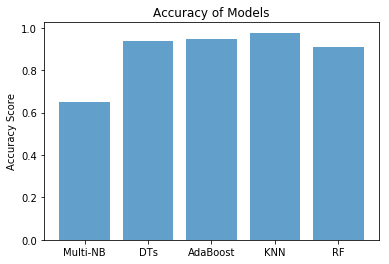

In [35]:
import matplotlib.pyplot as plt

#ploating data for F1 Score
objects = ('Multi-NB', 'DTs', 'AdaBoost', 'KNN', 'RF')
y_pos = np.arange(len(objects))
y_val = [ x for x in pred_val]
plt.bar(y_pos,y_val, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()